<a href="https://colab.research.google.com/github/raulFuzita/cct_data_exploration_and_preparation/blob/CA2/raul_fuzita_AI_DV_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BSc (Hons) in Computing in IT (4th Yr)

## Data Exploration & Preparation - CA

Lecturer: Dr. Muhammad Iqbal

Student Name: Raul Macedo Fuzita

Student ID: 2018337

## Importing the data set <font color='red'>(Important)</font>

In [6]:
#@markdown 👈 Please, run this cell to import the data set from a source available at [https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/]("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/)
df <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

#@markdown If the data set is imported currectly you should see the five first rows.
head(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


## Importing All the Necessary Packages for This project <font color="red">(Important)</font>

1.   List item
2.   List item



In [7]:
#@markdown 👈 Please, run this cell to import the following libraries: `gplots, reshape2, dplyr, ggplot2`.

#@markdown If one of these packages are not imported the you experience errors and fails. You must install these packages by running thiscode block.

install.packages("gplots")
library(gplots)

install.packages("reshape2")
library(reshape2)

library(dplyr)
library(ggplot2)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()  

In [8]:
#@markdown 👈 Please, run this cell to create custome function that will be used later on. I cannot stress enough the importance of running this cell. Make sure you have run this code block. <font color="red">(Important)</font>

# https://stackoverflow.com/questions/44050028/min-max-scaling-normalization-in-r-for-train-and-test-data
mmnorm <- function(x, na.rm = TRUE) {
    ((x - min(x)) / (max(x) - min(x)))
}

zscore <- function(x, na.rm = TRUE){
  (x - mean(x))/sd(x)
}

robust_scalar <- function(x, na.rm = TRUE){
  (x - median(x)) /(quantile( x,probs =.75) - quantile( x,probs = .25))
}

#### Mmnorm() arguments:

```
mmnorm(x, na.rm = TRUE)
```


#### Zscore() arguments:

```
zscore(x, na.rm = TRUE)
```


#### Robust_scalar() arguments:

```
robust_scalar(x, na.rm = TRUE)
```

### Discuss and describe the purpose and need for data exploration and mining within data analytics projects. Describe the possible consequences of relying on completely automatic data analysis tools rather than using manual statistical tools. Use illustrations to justify your answer.

<p align="justify">
&emsp;&emsp;Paulo Cortez and Aníbal Morais published research in regard to the dataset in question. The paper entitled <i>A Data Mining Approach to Predict Forest Fires using Meteorological Data</i> suggests that the research and model could be used to develop an automatic solution.
</p>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
Since traditional human surveillance is expensive and affected by subjective factors, there has been an emphasis to develop automatic solutions. These can be grouped into three major categories [1]: satellite-based, infrared/smoke scanners and local sensors (e.g. meteorological). Satellites have acquisition costs, localization delays and the resolution is not adequate for all cases. Moreover, scanners have a high equipment and maintenance costs. Weather conditions, such as temperature and air humidity, are known to affect fire occurrence [15]. Since automatic meteorological stations are often available (e.g. Portugal has 162 official stations), such data can be collected in real-time, with low costs (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>

<p align="justify">
&emsp;&emsp;In the research conclusion section, they stated that the effort to build an automatic system that could assist Fire Management System (FMS) depends on three major trends: satellite data, infrared/smoke scanners, and local sensors. They proposed a Data Mining (DM) approach that uses meteorological data, as detected by local sensors in weather stations. Although they proposed a DM approach they once again suggest the techniques applied open room for the development of automatic tools.
</P>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
This study was based on an off-line learning, since the DM techniques were applied
after the data was collected. However, this work opens room for the development of
automatic tools for fire management support (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>

<p align="justify">
&emsp;&emsp;Paulo Cortez and Aníbal Morais acknowledge the DM approach was based on Support Vector Machines (SVM), therefore, it is capable of predicting small fires; however, there is a drawback with this approach which cannot predict for large fires. They added that in order to improve the model it is necessary to add additional information, such as type of vegetation and firefighting intervention.
</p>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
As argued in [18], predicting the size of forest fires is
a challenging task. To improve it, we believe that additional information (not available
in this study) is required, such as the type of vegetation and firefighting intervention
(e.g. time elapsed and firefighting strategy) (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>


<p align="justify">
&emsp;&emsp;Fire Weather Index (FWI) system depends on weather readings, such as fuel mosisture codes, fire behavior indices, and fuel types. A FWI process flow Chart is available in the <i>National Wildfire Coordinating Group</i> website. See below the chart (<a href="https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system">National Wildfire Coordinating Group, 2021</a>).
</p>

<img src="https://www.nwcg.gov/sites/default/files/publications/images/437-cffdrs-overview-fwi-flowchart.png" alt="https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system" width="500">

<labe>figure 1</lable>

<p align="justify">
&emsp;&emsp;Paulo Cortez and Aníbal Morais research was published in 2007. In nowadays, we have more sophisticated AI models, technologies, and algorithms. 

&emsp;&emsp;FWI system consists of variables, steps and a graphical representation of the flowchart. It should not be too hard with recent technologies to automate the same process to predict the spread of fire and the damaged area.

&emsp;&emsp;I want to point out I need to investigate it for further information. My opinion will be based on what I have learned in the Artificial Intelligence subject and my researches as a student.

&emsp;&emsp;Professor David Kopec published in his book, Classic Computer Science Problems in Python, an algorithm that uses Constraint Satisfaction Problem (CSP) to give weight to words and calculate scenarios with graphs (<a href="https://livebook.manning.com/book/classic-computer-science-problems-in-python/chapter-3/59">Livebook Manning, 2019</a>). As mentioned, the FWI system has steps and states, which we could implement in an automated system the state pattern to process and make decisions based on a dataset. Of course, this approach is much harder and would take longer to build a system. However, we have available technologies, such as YOLO-V4, Darknet, and Tensorflow to train models and generate ready packages for various programming languages. The question is how to rationalize as humans to consider environmental nuances? Generative Pre-trained Transformer 3 (GPT-3) is a model that can use <i>Semantic Search</i> to answer complex natural-language questions quickly and accurately. It can also be integrated with other technologies.
</p>

<blockquote cite="https://www.twilio.com/blog/what-is-gpt-3">
<q>
Whether you're looking for an answer to a question or more relevant search results, GPT-3 can help. Rather than just keyword matching, GPT-3's extensive knowledge can be used to answer complex natural-language questions quickly and accurately (<a href="https://www.twilio.com/blog/what-is-gpt-3">Twilio, 2020</a>).
</q>
</blockquote>



#### AI-Generated Recipe

<p align="justify">
&emsp;&emsp;GPT-3 has written a detailed recipe that is indistinguishable from a humam writting. Above see a sniptch for the AI recipe.
</p>

<blockquote cite="https://www.twilio.com/blog/what-is-gpt-3">
<i>
I love a good banana shake. I must have tried a thousand of them over the years. So, when I wanted to add one to the menu of the cafe, I was pretty picky. I wanted something that tasted good but wasn’t overly sweet. I wanted the banana and vanilla flavors to really shine through.
<br><br>
Since I was using fresh bananas, I wanted them to be the ripest, sweetest ones I could find. I use a banana or two (depending on size), one cup of vanilla almond milk, 3/4 cup of ice, 3/4 cup of milk, 1/4 cup of nonfat plain greek yogurt, 2 tbl of almond milk creamer, 1 tbl of cocoa powder, 1/2 tsp of cinnamon, 1/4 tsp of nutmeg, and 1/8 tsp of ground cloves. For the Oreo shake, I add 1/2 cup of nonfat plain greek yogurt. That’s it! So simple and so good.
<br><br>
It’s a simple recipe, but that’s the best part. Fresh ingredients make a huge difference. The bananas, vanilla, and cocoa are such a great combo (<a href="https://www.twilio.com/blog/what-is-gpt-3">Twilio, 2021</a>).
</i>
</blockquote>



#### Why Data Mining is Important?

<p align="justify">
&emsp;&emsp;Data Mining (DM) consists of an analytical process designed to explore big data (usually related to business, market decision, and scientific researches) to find consistent systematic patterns between variables, and then it is validated by applying the detected patterns to a new set of data. The process is divided into six steps: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

&emsp;&emsp;The DM premise is an active argumentation, it means instead of a user defining the problem, selecting the data and tools to analyse such dataset, the DM search automatically for outliers, relations, and correlation, thus identifying problems that had not been identified by the user.

&emsp;&emsp;DM used for Artificial intelligence (AI), Association rule learning, Clustering, Classification, Data analytics, Data warehousing, Machine learning, and Regression (<a href="https://www.pantechelearning.com/importance-of-data-mining-and-its-uses/">Pantech e Learning, 2022</a>).
</p>

#### Conclusion

<p align="justify">
&emsp;&emsp;I believe Data Mining will stick with us for a long time, or maybe forever. We should not be concerned whether it is a human implementing manually DM or an AI. The primary concern is whether we have ways to mitigate small or big fires in forests. Even GPT-3 still depends on us to tell what we want, what we are looking for.
<br>
&emsp;&emsp;As long humans stay curious, we shall exploit technologies to find solutions for our world.
</p>

### Are outliers present in the above data set? Provide a strategy of removing outliers from the data set.

<p align="justify">
&emsp;&emsp;The dataset under analysis is available on the UCI webpage. Before the source section, a table is presented with an overview of the dataset. It states if there is any missing data we should have an NA value. It is added some values are skewed towards 0.0, and the recommendation is to model with the logarithm transform.
</p>

<blockquote cite="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">
<q>
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transformation) (<a href="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">UCI Machine Learning Repository, 2022</a>).
</q>
</blockquote>

In [9]:
#@markdown 👈 Please, run this cell to look for NA data. This is an important step in cleaning a data set. A TRUE value is printed if there is any NA value in the data set. Otherwise FALSE.

#@markdown The function to check for any NA value is `any(is.na(df))`
any(is.na(df))

[1] FALSE

In [10]:
#@markdown 👈 Plase run this cell. You can also achieve a similar result by running the function `sum(is.na(df))`. This function will sum all the values that contain NA.

#@markdown If there is no NA value you should see a zero. Otherwise the sum of all the occurrences.

# https://datacornering.com/check-if-a-column-has-a-missing-values-na-in-r/
sum(is.na(df))

[1] 0

#### Example of Shifting Values with Logarithm Transformation

In [11]:
#@markdown 👈 Run this cell to show the following values of a vector shifted by 1.

#@markdown `c(100, 10, 5, 2, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001)`

# https://www.programmingr.com/tutorial/log-in-r/
# log in R - vector transformation 
v = c(100,10,5,2,1,0.5,0.1,0.05,0.01,0.001,0.0001)
q=log(v+1)
q

[1] 4.6151205168 2.3978952728 1.7917594692 1.0986122887 0.6931471806
 [6] 0.4054651081 0.0953101798 0.0487901642 0.0099503309 0.0009995003
[11] 0.0000999950

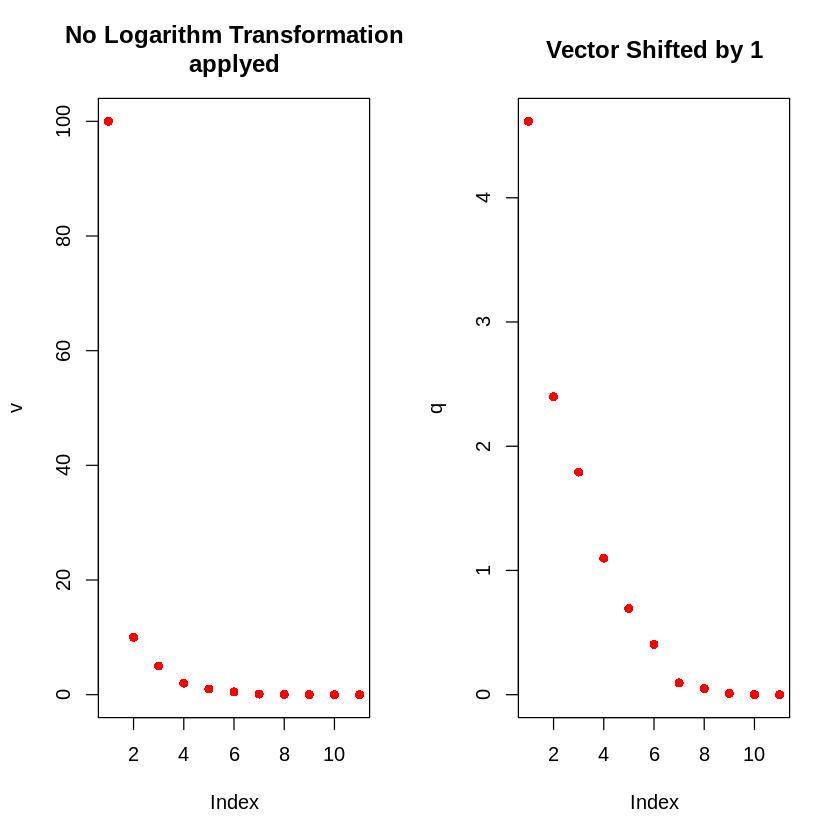

In [12]:
#@markdown 👈 Run this cell to plot the difference between the vector values before and after the logarithm transformation.

# https://stackoverflow.com/questions/6774339/r-how-do-i-put-two-box-plots-next-to-each-other-keeping-same-y-range-for-both
par(mfrow = c(1, 2))
plot(v, pch=16, col="red", main="No Logarithm Transformation\napplyed")
plot(q, pch=16, col="red", main="Vector Shifted by 1")

#### Shifting Area Variable with Logarithm Transformation

In [21]:
#@markdown 👈 Run this cell to shift the area variable values by 2.

#@markdown Notice that there is not any value of 0.0

logTranf = log(df$area+2)
logTranf

[1] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
  [8] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [15] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [22] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [29] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [36] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [43] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [50] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [57] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [64] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [71] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [78] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [85] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [92] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [99] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[106] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[113] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[120] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[127] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[134] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.8586616 0.8878913
[141] 0.9042182 0.9360934 0.9593502 0.9969486 1.0188473 1.0647107 1.0818052
[148] 1.0851893 1.1216776 1.1378330 1.1600209 1.2119410 1.2325603 1.2412686
[155] 1.2412686 1.2697605 1.2837078 1.2892326 1.2919837 1.3056265 1.3217558
[162] 1.3609766 1.3711807 1.3737156 1.3887912 1.4206958 1.4562867 1.5062972
[169] 1.5107219 1.5151272 1.5195132 1.5454326 1.5560371 1.6233408 1.7047481
[176] 1.8764069 1.8885837 1.9006139 1.9286187 1.9782390 1.9919755 2.0068708
[183] 2.1258479 2.1781550 2.1927702 2.2016592 2.2181159 2.2300144 2.2407097
[190] 2.3263016 2.3331143 2.3683728 2.3711779 2.4344902 2.4857396 2.4865719
[197] 2.5595502 2.5695541 2.5832426 2.5892667 2.6049094 2.6461748 2.7113780
[204] 2.7536607 2.7719635 2.8075938 2.8593396 2.9549103 3.0554153 3.2351428
[211] 3.2669038 3.3322045 3.3368366 3.3792925 3.4229589 3.4229589 3.4493524
[218] 3.4756862 3.5180911 3.5222344 3.5284172 3.6344233 3.6597081 3.6640743
[225] 3.6816030 3.9229629 3.9390543 4.0993321 4.1911687 4.2945606 4.5052393
[232] 4.5765649 4.6576678 4.6789781 5.0554812 5.2906883 5.3129104 5.3700797
[239] 6.9965351 0.6931472 0.6931472 0.6931472 2.4956817 0.6931472 1.5830939
[246] 1.0152307 0.7371641 1.0116009 0.6931472 1.4973884 0.9858168 0.8064759
[253] 0.7929925 1.2584610 2.5128460 0.6931472 2.3045831 0.9858168 0.6931472
[260] 1.2178757 2.3841651 1.6677068 1.8325815 1.2697605 2.1447610 1.0260416
[267] 0.7747272 0.6931472 0.6931472 1.8562980 0.9242589 2.4221443 1.6272778
[274] 2.3960754 2.5794590 1.9987736 2.9882040 2.5439614 3.1793030 2.4655539
[281] 2.4221443 3.2872819 0.6931472 1.1314021 3.2672850 0.6931472 0.6931472
[288] 0.6931472 0.6931472 0.6931472 0.6931472 2.3025851 1.5347144 4.4824374
[295] 2.1482677 0.6931472 1.0647107 0.6931472 0.6931472 0.6931472 0.6931472
[302] 1.7083779 0.6931472 0.6931472 0.6931472 0.6931472 0.8796267 1.9712994
[309] 0.6931472 0.6931472 0.6931472 2.7905514 0.6931472 0.6931472 1.2753628
[316] 0.6931472 0.6931472 1.7544037 0.6931472 1.8578593 3.5934693 2.2202899
[323] 1.1019401 1.4303112 1.8594181 0.6931472 0.6931472 0.6931472 0.6931472
[330] 1.6733512 2.1494339 2.8701691 2.5817308 1.4182774 0.6931472 0.6931472
[337] 0.6931472 4.0611324 2.2491843 1.2441546 1.7800242 0.6931472 0.6931472
[344] 1.4303112 2.0918641 2.0579625 3.4075107 0.6931472 0.6931472 1.2919837
[351] 1.7422190 2.2310891 1.3937664 1.3137237 2.0756845 2.7120422 1.1817272
[358] 0.6931472 0.6931472 2.3145137 1.1281711 1.7817091 0.9242589 1.5953390
[365] 2.0347056 3.0924052 1.3217558 0.6931472 2.68

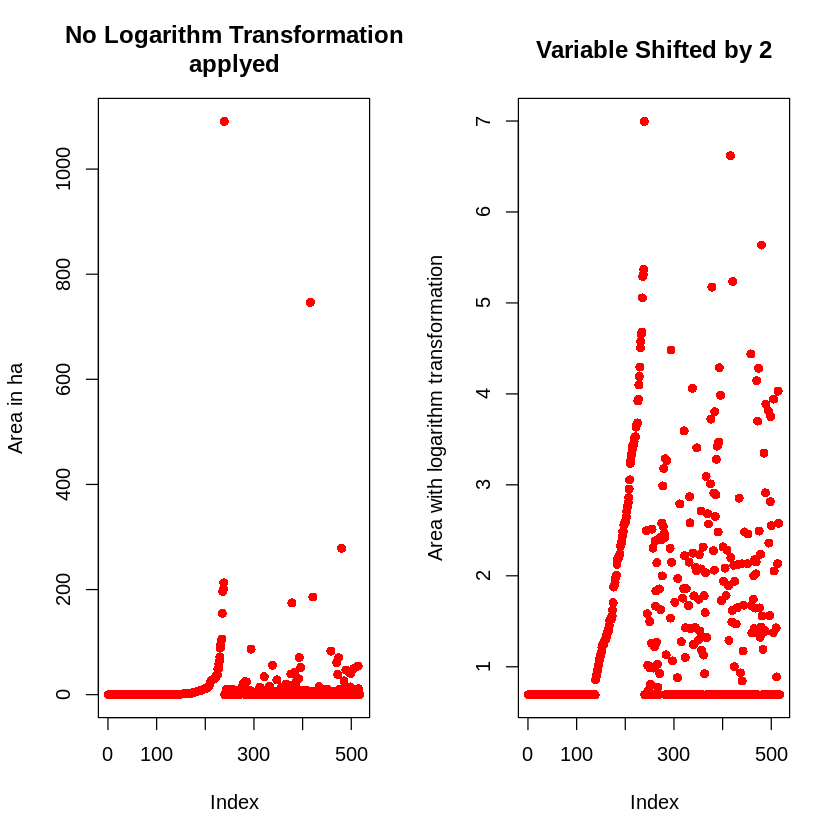

In [24]:
#@markdown 👈 Run this cell to plot the difference between the vector values before and after the logarithm transformation.

#@markdown By transforming area values we can see on the right plot the dots more spread in the graph.

par(mfrow = c(1, 2))
plot(df$area, pch=16, col="red", main="No Logarithm Transformation\napplyed", ylab="Area in ha")
plot(logTranf, pch=16, col="red", main="Variable Shifted by 2", ylab="Area with logarithm transformation")

### Choose a relevant encoding technique to transform the categorical data to numeric format.

In [15]:
#@markdown 👈 Please, run this cell to retrive all the categorical data and save it in a object called categorical. See below grouped the categorical data.

categorical <- df[lapply(colnames(df), function(x) class(df[[x]]) == 'character') == TRUE]
head(categorical)

,month,day
,<chr>,<chr>
1,mar,fri
2,oct,tue
3,oct,sat
4,mar,fri
5,mar,sun
6,aug,sun


### Formulate the questions for EDA (Exploratory Data Analysis) and perform EDA based on the data provided and address the issues to understand the impact of fire and the resulting burned area.

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

In [16]:
head(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [18]:
dim(df)

[1] 517  13

In [19]:
summary(df)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

### Explain the purpose of PCA (Principal Component Analysis) and how It is effective to reduce dimensionality of the dataset. Find two components of the above data set.

### Analyse the benefits and drawbacks for feature selection and extraction techniques. Which features are important from the provided dataset? (Feature Selection Method)

### Prepare the data for the machine learning model after encoding and feature selection, predict the burned area of forest fires using the machine learning model.

### You are free to perform any process to enhance an understanding of data preparation and exploration of the Forest data set.

## References